# Data Analysis Jupyter Notebook

This Jupyter Notebook is a template for data analysis. It includes installation of necessary libraries, loading datasets, and displaying basic information and statistics for each dataset.


## Environment preparation

First of all, we will install all the required packages:


In [1]:
#capture
#!python -m pip install --upgrade pip
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install scipy
#!pip install geopandas

## Data Understanding

We will read the datasets in order to understand the information that they contain.

In [231]:
# Import necessary libraries
import pandas as pd

# Load the three datasets
incidents_dataset = pd.read_csv('./project_datasets/incidents.csv', low_memory=False)
pbsy_dataset = pd.read_csv('./project_datasets/povertyByStateYear.csv')
ysdh_dataset = pd.read_csv('./project_datasets/year_state_district_house.csv')

After reading the datasets, we will execute some commands to have a preview about the information.

With `info()`, we will see the names of the columns of the datasets, the data type and the amount of non null values that they have. With `head()`, the first 5 rows of each dataset, that they will help us to have the idea of the dataset row types. Eventually, with `describe()` we will obtain the statisctical values of the numerical columns.

In [3]:
# Display basic information about each dataset
print("\n------- Incidents Info:-------")
print(incidents_dataset.info())

print("\n------- Dataset 2 Info:-------")
print(pbsy_dataset.info())

print("\n------- Dataset 3 Info:-------")
print(ysdh_dataset.info())


------- Incidents Info:-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 1

In [4]:
# Display the first few rows of each dataset
print("------- Incidents -------")
print(incidents_dataset.head())

print("\n------- Poverty By State and Year -------")
print(pbsy_dataset.head())

print("\n------- Year State District House -------")
print(ysdh_dataset.head())

------- Incidents -------
         date                 state city_or_county  \
0  2015-05-02               Indiana   Indianapolis   
1  2017-04-03          Pennsylvania           Kane   
2  2016-11-05              Michigan        Detroit   
3  2016-10-15  District of Columbia     Washington   
4  2030-06-14          Pennsylvania     Pittsburgh   

                              address  latitude  longitude  \
0       Lafayette Road and Pike Plaza   39.8322   -86.2492   
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district  \
0                     7.0                  94.0                   33.0   
1                     5.0                   NaN                    NaN   
2                    14.0                   4.0       

Here we can see that the data types of some of the columns are not correct, so we will fix them. For example, `date` columns has data type `object`, so we will convert it on datetime and some columns that contain numeric values are as `object` type as well, so we will change them. Also here, the modifications are done in the incidents dataset.

In [5]:
# Convert the 'date' column to datetime
incidents_dataset['date'] = pd.to_datetime(incidents_dataset['date'])

# Convert numeric data from object to numeric, handling errors
incidents_dataset['state_senate_district'] = pd.to_numeric(incidents_dataset['state_senate_district'], errors='coerce')
incidents_dataset['min_age_participants'] = pd.to_numeric(incidents_dataset['min_age_participants'], errors='coerce')
incidents_dataset['max_age_participants'] = pd.to_numeric(incidents_dataset['max_age_participants'], errors='coerce')
incidents_dataset['avg_age_participants'] = pd.to_numeric(incidents_dataset['avg_age_participants'], errors='coerce')
incidents_dataset['n_participants_child'] = pd.to_numeric(incidents_dataset['n_participants_child'], errors='coerce').astype('Int64')
incidents_dataset['n_participants_teen'] = pd.to_numeric(incidents_dataset['n_participants_teen'], errors='coerce').astype('Int64')
incidents_dataset['n_participants_adult'] = pd.to_numeric(incidents_dataset['n_participants_adult'], errors='coerce').astype('Int64')

# Verify the data types after conversion
print("\nData Types After Conversion:\n ---- Dataset 1 ----\n", incidents_dataset.dtypes)
print("\n ---- Dataset 2 ----\n", pbsy_dataset.dtypes)
print("\n ---- Dataset 3 ----\n", ysdh_dataset.dtypes)



Data Types After Conversion:
 ---- Dataset 1 ----
 date                         datetime64[ns]
state                                object
city_or_county                       object
address                              object
latitude                            float64
longitude                           float64
congressional_district              float64
state_house_district                float64
state_senate_district               float64
participant_age1                    float64
participant_age_group1               object
participant_gender1                  object
min_age_participants                float64
avg_age_participants                float64
max_age_participants                float64
n_participants_child                  Int64
n_participants_teen                   Int64
n_participants_adult                  Int64
n_males                             float64
n_females                           float64
n_killed                              int64
n_injured               

In [6]:
# Display basic statistics for each dataset
print("\n------- Incidents Statistics:-------")
print(incidents_dataset.describe())

print("\n------- Poverty By State and Year Statistics:-------")
print(pbsy_dataset.describe())

print("\n------- Dataset 3 Statistics:-------")
print(ysdh_dataset.describe())



------- Incidents Statistics:-------
                                date       latitude      longitude  \
count                         239677  231754.000000  231754.000000   
mean   2017-08-21 02:54:15.871860480      37.546598     -89.338348   
min              2013-01-01 00:00:00      19.111400    -171.429000   
25%              2015-07-11 00:00:00      33.903400     -94.158725   
50%              2016-08-25 00:00:00      38.570600     -86.249600   
75%              2017-08-09 00:00:00      41.437375     -80.048625   
max              2030-11-28 00:00:00      71.336800      97.433100   
std                              NaN       5.130763      14.359546   

       congressional_district  state_house_district  state_senate_district  \
count           227733.000000         200905.000000           207342.00000   
mean                 8.001265             55.447132               20.47711   
min                  0.000000              1.000000                1.00000   
25%                

### Datasets columns description

After analyzing the datasets with the previous commands, we will briefly describe each of the columns of the three datasets:

#### Incidents Dataset (incidents.csv)

- **Date of Incident (`date`):** This variable represents the date when the gun incident occurred.
- **State (`state`):** Indicates the state where the incident took place.
- **City or County (`city_or_county`):** Specifies the city or county where the incident occurred.
- **Address (`address`):** Represents the specific address where the incident took place.
- **Geographical Coordinates (`latitude, longitude`):** Provides the latitude and longitude of the incident location.
- **Congressional District (`congressional_district`):** Specifies the congressional district where the incident occurred.
- **State House District (`state_house_district`):** Represents the state house district of the incident.
- **State Senate District (`state_senate_district`):** Indicates the state senate district where the incident took place.
- **Participant Age (`participant_age1`):** Represents the exact age of one randomly chosen participant in the incident.
- **Participant Age Group (`participant_age_group1`):** Specifies the age group of one randomly chosen participant.
- **Participant Gender (`participant_gender1`):** Indicates the gender of one randomly chosen participant.
- **Minimum, Average, and Maximum Age of Participants (`min_age_participants, avg_age_participants, max_age_participants`):** Provide statistical measures of participant ages.
- **Number of Participants by Age Group (`n_participants_child, n_participants_teen, n_participants_adult`):** Gives the count of participants in different age groups.
- **Number of Males and Females (`n_males, n_females`):** Specifies the count of male and female participants.
- **Number of People Killed and Injured (`n_killed, n_injured`):** Represents the count of people killed and injured in the incident.
- **Number of Arrested and Unharmed Participants (`n_arrested, n_unharmed`):** Indicates the count of participants arrested and unharmed.
- **Total Number of Participants (`n_participants`):** Represents the total number of participants in the incident.
- **Additional Notes (`notes`):** Provides additional information or notes about the incident.
- **Incident Characteristics (`incident_characteristics1, incident_characteristics2`):** Specifies the characteristics of the incident.

#### Poverty By State and Year Dataset (povertyByStateYear.csv)

- **State (`state`):** The name of the state.
- **Year (`year`):** The year for which the poverty rate is recorded.
- **Poverty percentage (`povertyPercentage`):** The percentage of the population in poverty for a specific state and year.

#### Year State District House Dataset (year_state_district_house.csv)

- **Year (`year`):** The year of the election.
- **State (`state`):** The name of the state for which election results are recorded.
- **State (`congressional_district`):** The congressional district number for which election results are recorded.
- **Party (`party`):** The political party associated with the candidate.
- **Candidate votes (`candidatevotes`):** The number of votes received by a specific candidate in a particular congressional district.
- **Total votes (`totalvotes`):** The total number of votes cast in a particular congressional district.

### Data Quality Assessment

After having the idea of the content of the dataset, we will perform an analysis of the quality of the data.

Firstly, we will check for missing values in the dataset 1 columns. We will perform this analysis in the dataset of incidents only, because the other two do not have missing values.

With the next graph we can see the distribution of missing values for each column. For example, we can see that the column with more missing values is  `incident_characteristic2`. This occurs because most of the incidents do not have two characteristics, but just one, since we can see that `incident_characteristic1` has almost no missing values.

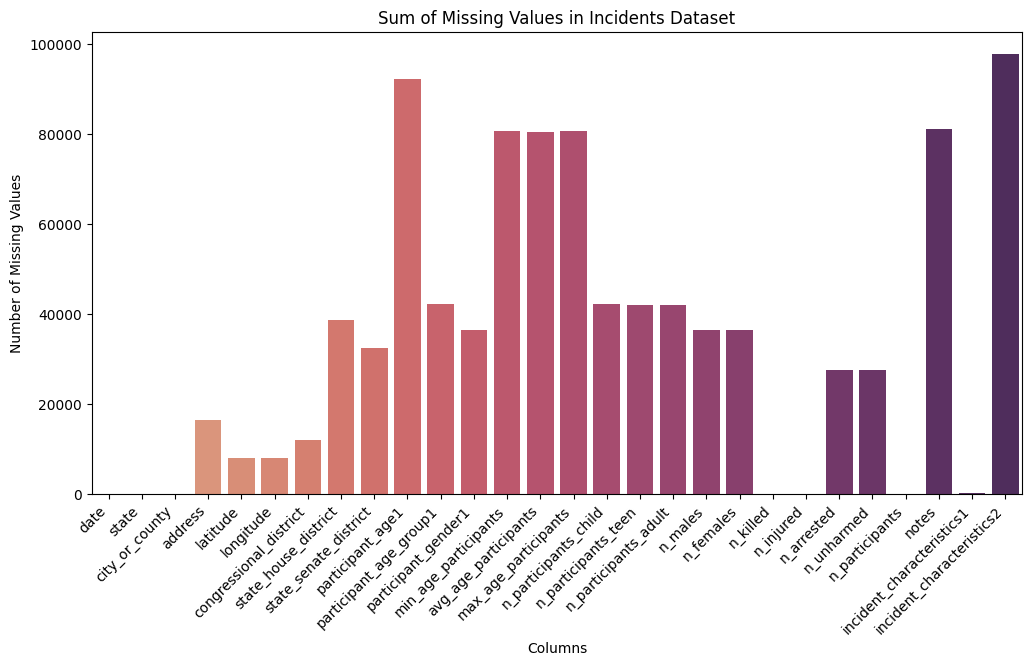

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = incidents_dataset.isnull().sum()
#print("\nMissing Values:\n", missing_values)

# Plotting the sum of missing values for each column using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette='flare', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Sum of Missing Values in Incidents Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

Cases that do not have the characteristic specified (`incident_characteristics1` = *null*), would be removed, since we would not know what was the incident about, and it does not make sense to analyze them.

The data that doesn't have any `address` and any `latitude` and `longitude` will be eliminated since it does not make sense that an incident has not occurred anywhere and also the number of incidents with this condition is insignificant compared to the number of total incidents. The cases that have an address but no coordinates, or vice versa, would be maintained.

With the column of `participant_age1` we will fill the nulls with the average age of the participants, if this is not null.

Although many other columns have empty values, are columns that null values are possible, since they do not necessarily have to have values. Therefore, we will leave them as there are.

- Number of Rows in the Original Dataset: 239677
- Number of Rows in the Cleaned Dataset: 239032


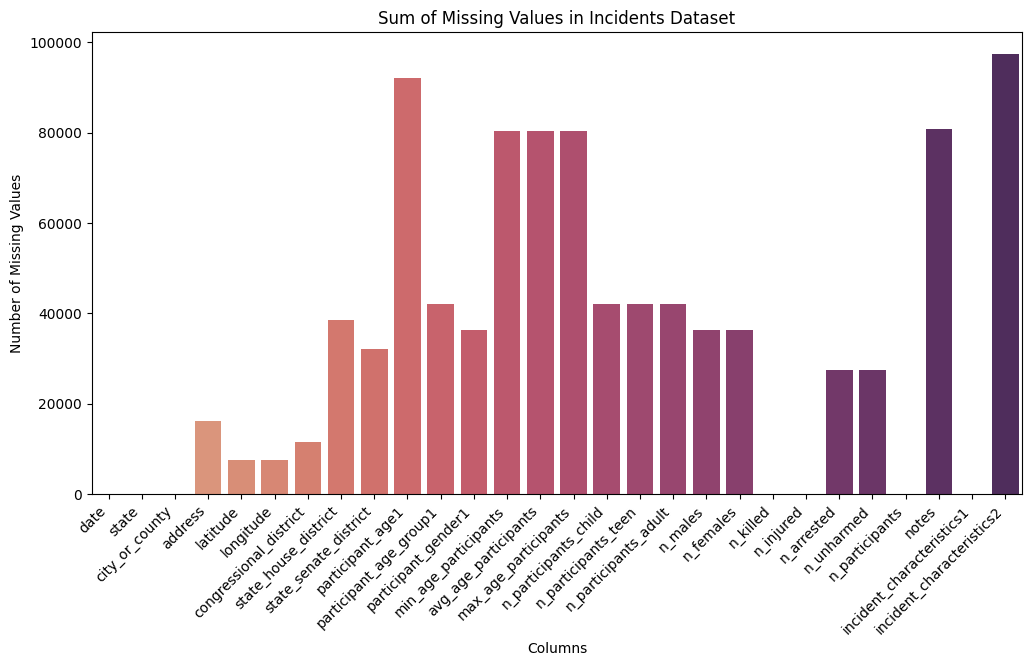

In [8]:
print("- Number of Rows in the Original Dataset:", incidents_dataset.shape[0])

# Eliminate the data that have null in incident_characteristics1, adress, latitude and adress.
incidents_dataset = incidents_dataset.dropna(subset=['incident_characteristics1'], how='all')
incidents_dataset = incidents_dataset.dropna(subset=['latitude', 'longitude', 'address'], how='all')

# Fill missing values in 'participant_age1' with values from 'avg_age_participants'
#incidents_dataset['participant_age1'] = incidents_dataset['participant_age1'].fillna(incidents_dataset['avg_age_participants'])

print("- Number of Rows in the Cleaned Dataset:", incidents_dataset.shape[0])

# Print mising values label
missing_values = incidents_dataset.isnull().sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, hue=missing_values.index, palette='flare', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Sum of Missing Values in Incidents Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

After that, we will check for duplicated values in the datasets. We can see that the incidents dataset is the only one that has duplicates, so we remove them and then verify that we have done it correctly.

In [9]:
# Check for duplicates
d1_duplicates = incidents_dataset.duplicated().sum()
print("- Number of Duplicates:", d1_duplicates)

# Remove duplicate rows
incidents_dataset.drop_duplicates(inplace=True)

# Verify the removal of duplicates
d1_duplicates_after_removal = incidents_dataset.duplicated().sum()
print("\n- Number of Duplicates After Removal:", d1_duplicates_after_removal)


- Number of Duplicates: 296

- Number of Duplicates After Removal: 0


In [10]:
# Check for duplicates
d2_duplicates = pbsy_dataset.duplicated().sum()
print("- Number of Duplicates:", d2_duplicates)

- Number of Duplicates: 0


In [11]:
# Check for duplicates
d3_duplicates = ysdh_dataset.duplicated().sum()
print("- Number of Duplicates:", d3_duplicates)

- Number of Duplicates: 0


### Distribution of variables

Then, we will see the distribution of the variables in the different datasest.

#### Poverty Percentages evaluation

To start, we will see the distribution of the poverty rates by states.

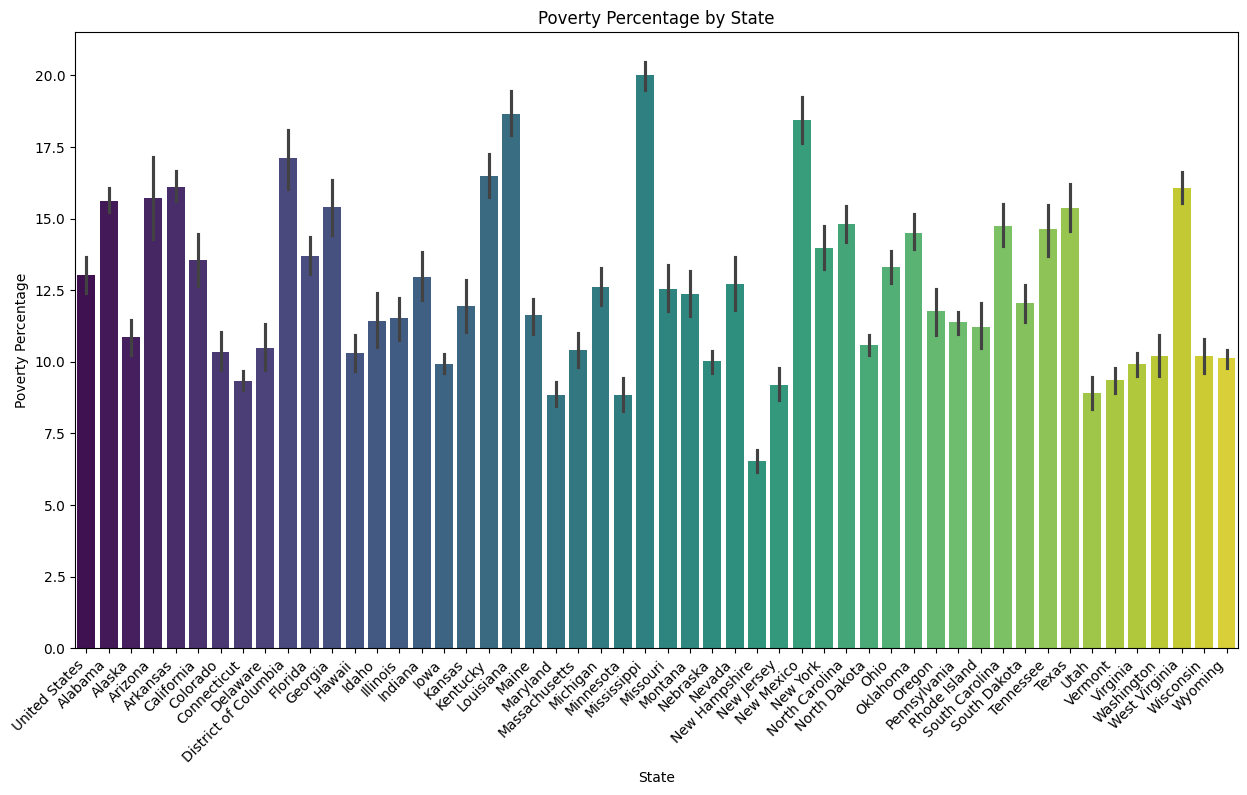

In [12]:
plt.figure(figsize=(15, 8))
sns.barplot(data=pbsy_dataset, x='state', y='povertyPercentage', hue='state', palette='viridis', dodge=False)
plt.title('Poverty Percentage by State')
plt.xlabel('State')
plt.ylabel('Poverty Percentage')
plt.xticks(rotation=45, ha='right')
plt.show()

In the previous chart, we can see that the first state is "United States". This is not correct, because the United States is the country, but not a state. Even tough we will not remove or modify it, we have to take it into account when doing analysis. In the cases that we analyze global poverty rates among the country, there is no problem using this dataset, but if we want to distinguish among states, or make analysis where the states have relevance, we should remove the rows that have the column state as "United States".

Then, we will make a boxplot so see the evolution of the poverty over the years, as well as the distribution of the poverty ranges in each year.

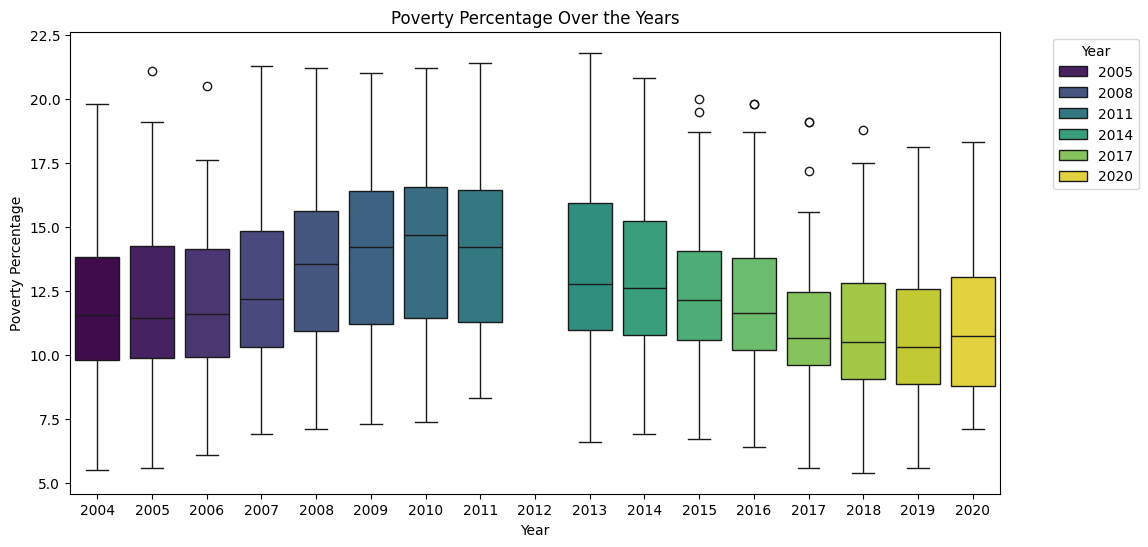

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pbsy_dataset, x='year', y='povertyPercentage', hue='year', palette='viridis', dodge=False)
plt.title('Poverty Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


We can see in the previous graph that there are no values in the year 2012. To check that we can filter the data by year and not *null* data, and check that there are no rows. Nevertheless, there are 52 rows with null values.

In [93]:
entries_2012 = pbsy_dataset[pbsy_dataset['year'] == 2012]
entries_2012_null = pbsy_dataset[(pbsy_dataset['year'] == 2012) & (pbsy_dataset['povertyPercentage'].isnull())]

print('- Amount of entries for 2012: ' + str(entries_2012.shape[0]))
print('- Empty Amount of entries for 2012: ' + str(entries_2012_null.shape[0]))

- Amount of entries for 2012: 52
- Empty Amount of entries for 2012: 52


So to fix this problem, we will use the *mean imputation* technique including some random noise, which consist on computing the mean of the observed values for each variable and imputing the missing values for that variable by this mean, modifying it slightly for each case.

In this case, instead of getting the complete average, we impute the missing values using the average of the adjacent years (2011 and 2013).

In [98]:
import numpy as np

# Value to control the strength of the noise
noise_strength = 0.05

# Set the entries of 2012 as missing rows
missing_rows  = entries_2012_null

# Get the average of 'povertyPercentage' for the adjacent years
average_2011 = pbsy_dataset.loc[pbsy_dataset['year'] == 2011].groupby('state')['povertyPercentage'].transform('mean')
average_2013 = pbsy_dataset.loc[pbsy_dataset['year'] == 2013].groupby('state')['povertyPercentage'].transform('mean')

# If there are missing rows, calculate the average with added random noise
if not missing_rows.empty:
    # Calculate the average with added random noise
    noisy_average = np.random.uniform((1 - noise_strength) * average_2011, (1 + noise_strength) * average_2013)

    # Fill the missing values with the calculated averages with noise
    pbsy_dataset.loc[missing_rows.index, 'povertyPercentage'] = noisy_average


# Check if there are any missing values remaining
entries_2012_null = pbsy_dataset[(pbsy_dataset['year'] == 2012) & (pbsy_dataset['povertyPercentage'].isnull())]
print('- Empty Amount of entries for 2012: ' + str(entries_2012_null.shape[0]) + '\n')

#Print some rows as example
entries_2012 = pbsy_dataset[pbsy_dataset['year'] == 2012]
print(entries_2012.head())


- Empty Amount of entries for 2012: 0

             state  year  povertyPercentage
416  United States  2012          14.938109
417        Alabama  2012          16.403916
418         Alaska  2012          10.650552
419        Arizona  2012          19.272426
420       Arkansas  2012          17.077768


Now if we repeat the previous graph we can see that there are no missing values in 2012.

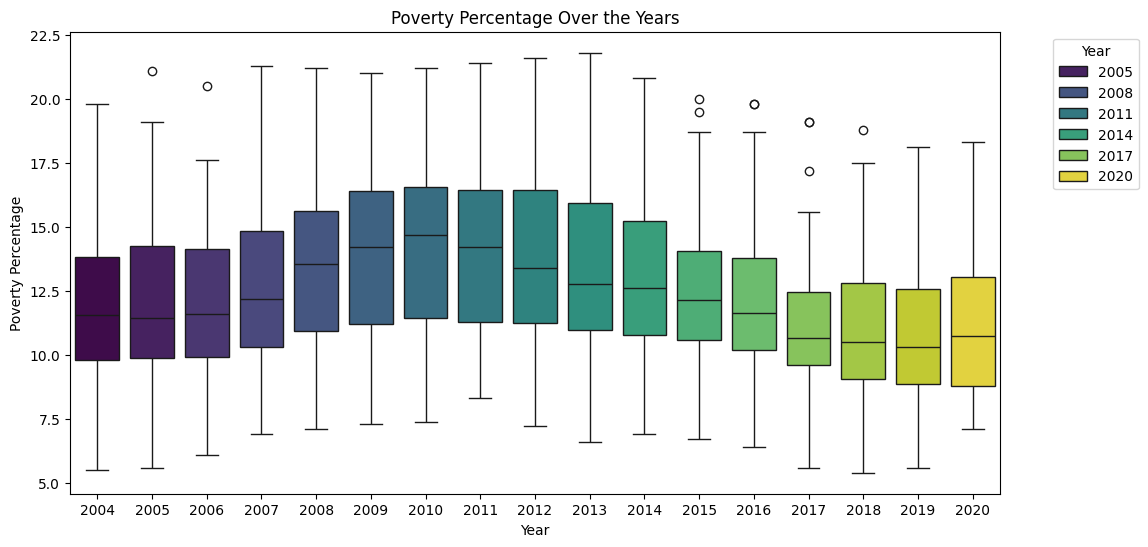

In [99]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=pbsy_dataset, x='year', y='povertyPercentage', hue='year', palette='viridis', dodge=False)
plt.title('Poverty Percentage Over the Years')
plt.xlabel('Year')
plt.ylabel('Poverty Percentage')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

To conclude, with all the modifications done, we will see the general distribution of the poverty rates throughout all the US. We can see that even tough there are some rates that are higher, the distribution is skewed right.

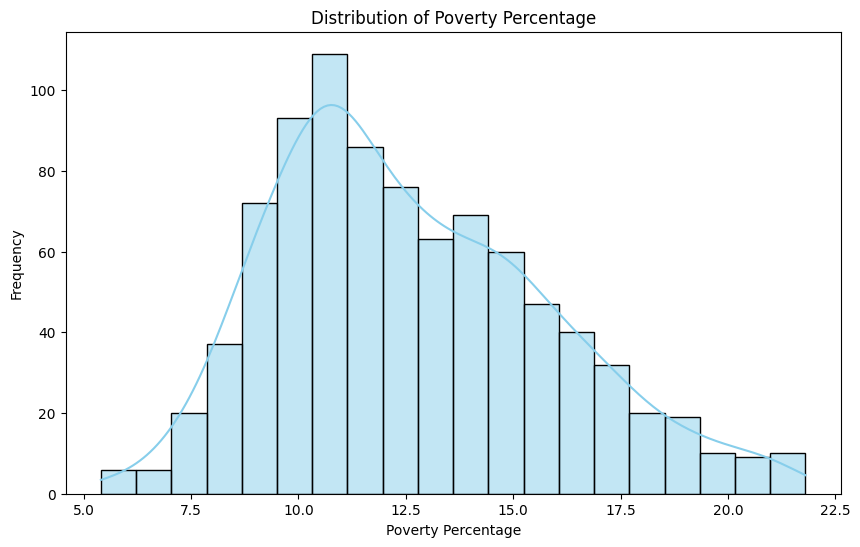

In [100]:
plt.figure(figsize=(10, 6))
sns.histplot(data=pbsy_dataset, x='povertyPercentage', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Poverty Percentage')
plt.xlabel('Poverty Percentage')
plt.ylabel('Frequency')
plt.show()


#### Evaluation of elections dataset

Similar analysis will be performed for the elections dataset. Firstly, we will check the evolution of the amount of votes per year. In general, we can say that the participation in the elections has been increasing by the years.

Nevertheless, we know that the elections are every 4 years, while in this dataset there are entries every 2 years. That's why in the graph we can see the difference in the amount of votes every two years. We assume that this votes correspond to the midterm that the US does for the elections. For now we will keep it until concluding with the modifications. After finishing with the modifications we will separate in two datasets: one with all the voting campaigns and the other one just with the elections.

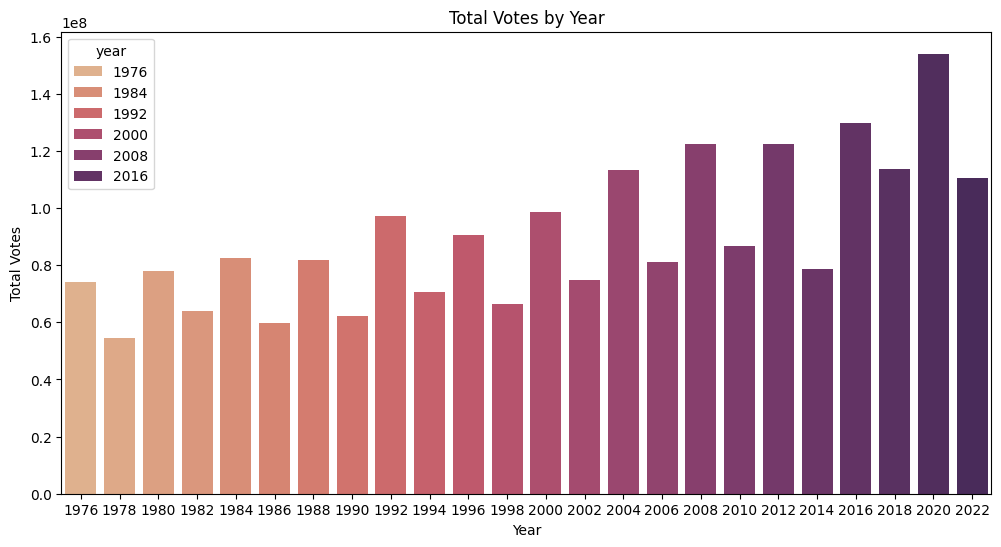

In [168]:
yearly_total_votes = ysdh_dataset.groupby('year')['totalvotes'].sum().reset_index(name='total_votes')

plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_total_votes, x='year', y='total_votes', hue='year', palette='flare')
plt.title('Total Votes by Year')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.show()


With the scatter plot of the relations between candidate votes and total votes, we can detect an anomaly in the dataset. We have many values in the (0,0), which means that `candidatevotes` and `totalvotes` are the same. And we can see points in the top right of the chart, which are clearly anomalies as well.

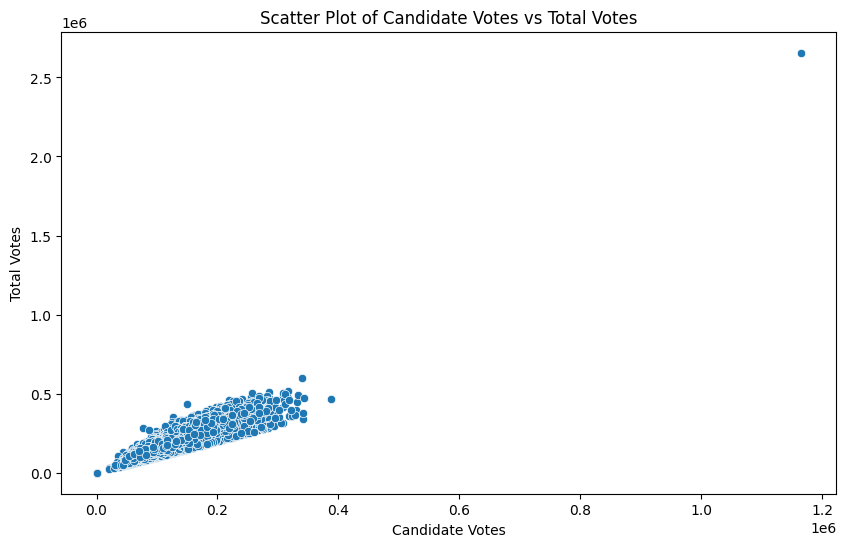

In [235]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='candidatevotes', y='totalvotes', data=ysdh_dataset)
plt.title('Scatter Plot of Candidate Votes vs Total Votes')
plt.xlabel('Candidate Votes')
plt.ylabel('Total Votes')
plt.show()


With the next query we can see the entries where the total amount of votes is the same as the candidate votes, something that is a bit strange. There are 407 entries with the same values, and we can see that even tough there are some rows that not, most of them have one vote for candidate and one vote in total, which could be possible but it seems an anomaly.

In [236]:
same_votes_entries = ysdh_dataset[ysdh_dataset['candidatevotes'] == ysdh_dataset['totalvotes']]

print(same_votes_entries.shape[0])
print(same_votes_entries.head())

(407, 6)
    year       state  congressional_district       party  candidatevotes  \
14  1976    ARKANSAS                       3  REPUBLICAN               1   
15  1976    ARKANSAS                       4    DEMOCRAT               1   
46  1976  CALIFORNIA                      31    DEMOCRAT           83155   
71  1976     FLORIDA                       1    DEMOCRAT               1   
72  1976     FLORIDA                       2    DEMOCRAT               1   

    totalvotes  
14           1  
15           1  
46       83155  
71           1  
72           1  


183 entries have this 1-1 problem.

In [237]:
one_vote_entries = ysdh_dataset[(ysdh_dataset['candidatevotes'] == 1) | (ysdh_dataset['totalvotes'] == 1)]

print(one_vote_entries.shape)
print(one_vote_entries.head())

(183, 6)
    year     state  congressional_district       party  candidatevotes  \
14  1976  ARKANSAS                       3  REPUBLICAN               1   
15  1976  ARKANSAS                       4    DEMOCRAT               1   
71  1976   FLORIDA                       1    DEMOCRAT               1   
72  1976   FLORIDA                       2    DEMOCRAT               1   
73  1976   FLORIDA                       3    DEMOCRAT               1   

    totalvotes  
14           1  
15           1  
71           1  
72           1  
73           1  


Those 1-1 entries will be removed.

In [ ]:
ysdh_dataset = ysdh_dataset[(ysdh_dataset['candidatevotes'] > 1) & (ysdh_dataset['totalvotes'] > 1)]

In [ ]:
# Here the anomaly detected in the scatter plot should be fixed

Apart from that the big problem that we have with this dataset is its structure. The elections results are divided by states, which it is correct, but also by congressional districts, which is not relevant for our analysis.

Moreover, we do not have the information about the amount of votes that each party obtained in each congressional district. We only know which party was the winner in each congressional party, and how many votes they got. Then we have the total amount of votes, but we do not know how are distributed among the rest of the parties.

As an example, we will get the first year and the first state (1976 and Alabama):

In [209]:
rows_1976_alabama = ysdh_dataset[(ysdh_dataset['year'] == 1976) & (ysdh_dataset['state'] == 'ALABAMA')]
print(rows_1976_alabama)


   year    state  congressional_district       party  candidatevotes  \
0  1976  ALABAMA                       1  REPUBLICAN           98257   
1  1976  ALABAMA                       2  REPUBLICAN           90069   
2  1976  ALABAMA                       3    DEMOCRAT          106935   
3  1976  ALABAMA                       4    DEMOCRAT          141490   
4  1976  ALABAMA                       5    DEMOCRAT          113553   
5  1976  ALABAMA                       6  REPUBLICAN           92113   
6  1976  ALABAMA                       7    DEMOCRAT          110496   

   totalvotes  
0      157170  
1      156362  
2      108048  
3      176022  
4      113560  
5      162518  
6      110501  


In [171]:
alabama_1976_d1 = rows_1976_alabama.iloc[0]

print('- Votes for Republicans in Alabama district 1: ' + str(alabama_1976_d1['candidatevotes']))
print('- Votes for other parties in Alabama district 1: ' + str(alabama_1976_d1['totalvotes'] - alabama_1976_d1['candidatevotes']))

- Votes for Republicans in Alabama district 1: 98257
- Votes for other parties in Alabama district 1: 58913


Since in the US mainly all the votes goes for republicans or democrats, it could be said that the other votes, could be set to the other party in each row. However, we check that the dataset has more parties apart from republicans and democrats, so this modification would not be entirely correct.

In [219]:
unique_parties = ysdh_dataset['party'].unique()
print("Different Parties:", unique_parties)


Different Parties: ['REPUBLICAN' 'DEMOCRAT' 'FOGLIETTA (DEMOCRAT)' 'DEMOCRATIC-FARMER-LABOR'
 'INDEPENDENT' 'INDEPENDENT-REPUBLICAN']


Anyway, we checked which is the percentage that these little parties occupy in the results. The result was less than a 1% of the entire votes during the history.

In [220]:
total_votes_by_party = ysdh_dataset.groupby('party')['totalvotes'].sum().reset_index()

# Calculate the percentage of total votes for each party
total_votes_by_party['percentage'] = (total_votes_by_party['totalvotes'] / total_votes_by_party['totalvotes'].sum()) * 100

print(total_votes_by_party)

# Filter out Republicans and Democrats
other_parties = total_votes_by_party[~total_votes_by_party['party'].isin(['REPUBLICAN', 'DEMOCRAT'])]

# Calculate the sum of the percentage for other parties
sum_percentage_other_parties = other_parties['percentage'].sum()

print(f"\nSum of the percentage for other parties: {sum_percentage_other_parties:.2f}%")



                     party  totalvotes  percentage
0                 DEMOCRAT  1071081268   49.404289
1  DEMOCRATIC-FARMER-LABOR    15659480    0.722303
2     FOGLIETTA (DEMOCRAT)      155451    0.007170
3              INDEPENDENT     2421494    0.111693
4   INDEPENDENT-REPUBLICAN      615754    0.028402
5               REPUBLICAN  1078059049   49.726143

Sum of the percentage for other parties: 0.87%


Therefore, we decide to remove these parties and just have the republicans and democrats.

- *FOGLIETTA (DEMOCRAT)* will convert in *DEMOCRAT*
- *DEMOCRATIC-FARMER-LABOR* will convert in DEMOCRAT
- *INDEPENDENT* will convert randomly in *DEMOCRAT* or *REPUBLICAN*
- *INDEPENDENT-REPUBLICAN* will convert in *REPUBLICAN*

In [221]:
import numpy as np

# Update 'party' column
ysdh_dataset['party'] = np.where(ysdh_dataset['party'] == 'FOGLIETTA (DEMOCRAT)', 'DEMOCRAT', ysdh_dataset['party'])
ysdh_dataset['party'] = np.where(ysdh_dataset['party'] == 'DEMOCRATIC-FARMER-LABOR', 'DEMOCRAT', ysdh_dataset['party'])
ysdh_dataset['party'] = np.where(ysdh_dataset['party'] == 'INDEPENDENT-REPUBLICAN', 'REPUBLICAN', ysdh_dataset['party'])

# Randomly assign 'DEMOCRAT' or 'REPUBLICAN' for 'INDEPENDENT'
independent_indices = ysdh_dataset[ysdh_dataset['party'] == 'INDEPENDENT'].index
ysdh_dataset.loc[independent_indices, 'party'] = np.random.choice(['DEMOCRAT', 'REPUBLICAN'], size=len(independent_indices))

# Verify the changes
print(ysdh_dataset['party'].unique())


['REPUBLICAN' 'DEMOCRAT']


In [225]:
test = ysdh_dataset
print(ysdh_dataset[500:510])

     year        state  congressional_district       party  candidatevotes  \
500  1978  CONNECTICUT                       2    DEMOCRAT          116624   
501  1978  CONNECTICUT                       3    DEMOCRAT           96830   
502  1978  CONNECTICUT                       4  REPUBLICAN           83990   
503  1978  CONNECTICUT                       5    DEMOCRAT           96738   
504  1978  CONNECTICUT                       6    DEMOCRAT          119537   
505  1978     DELAWARE                       0  REPUBLICAN           91689   
506  1978      FLORIDA                       1    DEMOCRAT           85608   
507  1978      FLORIDA                       2    DEMOCRAT          112649   
508  1978      FLORIDA                       3    DEMOCRAT               1   
509  1978      FLORIDA                       4    DEMOCRAT          113302   

     totalvotes  
500      166814  
501      166587  
502      143919  
503      184913  
504      186224  
505      157566  
506      135323

After having just the two main parties, the first modification of the dataset will be to include two new columns: `republican_votes` and `democrat_votes`.

If the party is republican, we know that `candidatevotes` are republican votes, so the rest are democrats votes (`totalvotes` - `candidatevotes`), and the same in the opposite way. In order to take into account the remaining votes for other political parties, we have reduced the calculation of the remaining votes to 1% (which is the average obtained previously, 0.87%).

In [213]:
def calculate_votes(row):
    resting_coef = 0.01
    if row['party'] == 'REPUBLICAN':
        return pd.Series([row['candidatevotes'], (row['totalvotes'] - row['candidatevotes']) * (1 - resting_coef)])
    else:
        return pd.Series([(row['totalvotes'] - row['candidatevotes']) * (1 - resting_coef), row['candidatevotes']])

# Apply the custom function to create new columns
ysdh_dataset[['republican_votes', 'democrat_votes']] = ysdh_dataset.apply(calculate_votes, axis=1)

# Print the updated dataset
print(ysdh_dataset.head())


   year    state  congressional_district       party  candidatevotes  \
0  1976  ALABAMA                       1  REPUBLICAN           98257   
1  1976  ALABAMA                       2  REPUBLICAN           90069   
2  1976  ALABAMA                       3    DEMOCRAT          106935   
3  1976  ALABAMA                       4    DEMOCRAT          141490   
4  1976  ALABAMA                       5    DEMOCRAT          113553   

   totalvotes  republican_votes  democrat_votes  
0      157170          98257.00        58323.87  
1      156362          90069.00        65630.07  
2      108048           1101.87       106935.00  
3      176022          34186.68       141490.00  
4      113560              6.93       113553.00  


After this modification we can remove the `candidatevotes` columns, because it is useless for us.

In [217]:
# Drop the 'candidatevotes' column
ysdh_dataset.drop('candidatevotes', axis=1, inplace=True)

# Print the updated dataset
print(ysdh_dataset[0:10])

   year    state  congressional_district       party  totalvotes  \
0  1976  ALABAMA                       1  REPUBLICAN      157170   
1  1976  ALABAMA                       2  REPUBLICAN      156362   
2  1976  ALABAMA                       3    DEMOCRAT      108048   
3  1976  ALABAMA                       4    DEMOCRAT      176022   
4  1976  ALABAMA                       5    DEMOCRAT      113560   
5  1976  ALABAMA                       6  REPUBLICAN      162518   
6  1976  ALABAMA                       7    DEMOCRAT      110501   
7  1976   ALASKA                       0  REPUBLICAN      118208   
8  1976  ARIZONA                       1  REPUBLICAN      168119   
9  1976  ARIZONA                       2    DEMOCRAT      182128   

   republican_votes  democrat_votes  
0          98257.00        58323.87  
1          90069.00        65630.07  
2           1101.87       106935.00  
3          34186.68       141490.00  
4              6.93       113553.00  
5          92113.00    

To conclude with the modifications, we will remove the congressional_district information and merge the rows that have the same year and state. This way, we will have the information about the votes that each party has obtained in each year and state, which has been the winner, and the total amount of votes pero party and in total.

In [177]:
# Group by 'year' and 'state', summing up the votes
grouped_data = ysdh_dataset.groupby(['year', 'state']).agg({
    'totalvotes': 'sum',
    'republican_votes': 'sum',
    'democrat_votes': 'sum'
}).reset_index()

# Update the 'party' column based on the comparison of votes
grouped_data['party'] = grouped_data.apply(lambda row: 'REPUBLICAN' if row['republican_votes'] > row['democrat_votes'] else 'DEMOCRAT', axis=1)

# Print the updated dataset
print(grouped_data.head())

   year       state  totalvotes  republican_votes  democrat_votes       party
0  1976     ALABAMA      984181         315739.43       666128.89    DEMOCRAT
1  1976      ALASKA      118208          83722.00        34141.14  REPUBLICAN
2  1976     ARIZONA      729002         362192.15       363364.42    DEMOCRAT
3  1976    ARKANSAS      336391          74639.08       260998.00    DEMOCRAT
4  1976  CALIFORNIA     7442501        3266250.29      4150217.58    DEMOCRAT


Now that me conclude with the fixing, we will separate the dataset in two: one with all the voting campaigns and the other one just with the elections.

In [206]:
midterm_dataset = grouped_data[grouped_data['year'] % 4 != 0]
elections_dataset = grouped_data[grouped_data['year'] % 4 == 0]

# Display or print the first few rows to verify
print("Mid term voting dataset:")
print(midterm_dataset['year'].unique())

print("\nElections dataset:")
print(elections_dataset['year'].unique())


Mid term voting dataset:
[1978 1982 1986 1990 1994 1998 2002 2006 2010 2014 2018 2022]

Elections dataset:
[1976 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016 2020]


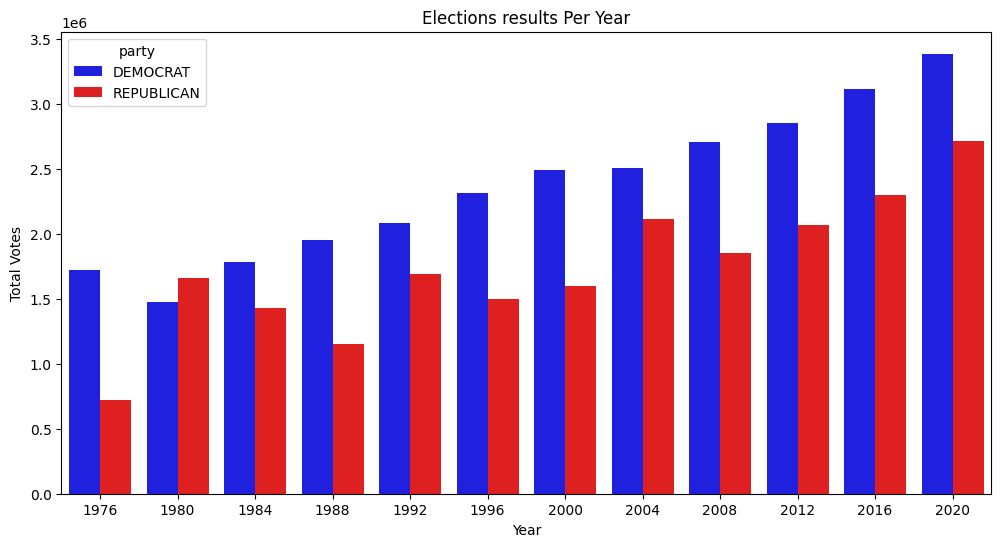

In [207]:
# Plot the total votes for each party per year
plt.figure(figsize=(12, 6))
sns.barplot(data=elections_dataset, x='year', y='totalvotes', hue='party', palette={'DEMOCRAT': 'blue', 'REPUBLICAN': 'red'}, errorbar=None)
plt.title('Elections results Per Year')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.show()


#### Evolution of Incidents Over Time

The evolution of the incidents over time is one of the most relevant topics to analyze, so in the next graph we display it. We can see something strange. There are values that start around 2014, that finish around middle of 2018, and then values that restart in 2028. We don't know why that data is in the dataset, if by mistake or if it is some kind of prediction that they have made, where they have the incident data that they would like to have for the future. Whatever it is, for our analysis the future data is not relevant, so we are going to remove it.

In [ ]:
# Count the number of incidents for each date
incident_counts = incidents_dataset['date'].value_counts().sort_index()

# Plotting the evolution of the amount of incidents over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_counts.index, y=incident_counts.values, marker='o', color='skyblue')
plt.title('Evolution of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filter out rows with 'date' in the future
incidents_dataset = incidents_dataset[incidents_dataset['date'].dt.year < 2028]

# Verify the changes
print(incidents_dataset['date'].describe())


In [ ]:
# Count the number of incidents for each date
incident_counts = incidents_dataset['date'].value_counts().sort_index()

# Plotting the evolution of the amount of incidents over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_counts.index, y=incident_counts.values, marker='o', color='skyblue')
plt.title('Evolution of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

Next issue that we can see is the difference between the incidents until 2014, with the incidents between 2014 and 2018. This does not occur because 2013 was the safest year of the history, but because there are way less values in the dataset than in the rest of the years. Therefore, in order not to alter the results, we have decided to remove entries older than 2014.

In [ ]:
# Extract the year from the 'date' column and create a new 'year' column
incidents_dataset['year'] = incidents_dataset['date'].dt.year

# Count the number of incidents by year
incident_counts_by_year = incidents_dataset['year'].value_counts().sort_index()

# Display the counts
print("Number of Incidents by Year:")
print(incident_counts_by_year)

In [ ]:
# Filter out rows with 'date' in the future
incidents_dataset = incidents_dataset[incidents_dataset['date'].dt.year > 2013]

# Verify the changes
print(incidents_dataset['date'].describe())

Final result of the plot would be the next one:

In [ ]:
# Count the number of incidents for each date
incident_counts = incidents_dataset['date'].value_counts().sort_index()

# Plotting the evolution of the amount of incidents over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=incident_counts.index, y=incident_counts.values, marker='o', color='skyblue')
plt.title('Evolution of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

#### Geographical Distribution of Incidents

In [ ]:
import geopandas as gpd

world_filepath = './110m_cultural/ne_110m_admin_0_countries.shp'
world = gpd.read_file(world_filepath)

# Create a GeoDataFrame from the incidents_dataset DataFrame
gdf = gpd.GeoDataFrame(incidents_dataset, geometry=gpd.points_from_xy(incidents_dataset.longitude, incidents_dataset.latitude))

# Plot the world map
world.plot(figsize=(12, 8), color='lightgrey', edgecolor='black')

# Plot the scatter plot on top of the world map
scatter_plot = sns.scatterplot(x='longitude', y='latitude', data=incidents_dataset, hue='n_killed', palette='viridis',
                               size='n_injured', sizes=(20, 200), alpha=0.7)

# Move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Geographical Distribution of Incidents')
plt.show()

##### Geographical data fixing

As we see in the data understanding section, there were some outliers in the geographical data, since it was visible that there were some incidents around India, when there would be just incidents from the USA.

To fix that we refined the filtering criteria based on the latitude and longitude values. We set the latitude and longitude ranges to cover the area of the United States, including Alaska and Hawaii that have different coordinates that the main US region. These adjusted ranges ensure that incidents falling within the geographical coordinates of the entire United States are retained in the filtered dataset. This refined filtering approach allows for the accurate representation of incident locations on the geographical scatter plot while eliminating data points located outside the intended area of interest.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the latitude and longitude ranges for the United States
us_latitude_range = (18, 71)
us_longitude_range = (-179, -66)

# Filter out incidents outside the US coordinates
incidents_dataset_us = incidents_dataset[(incidents_dataset['latitude'].between(*us_latitude_range)) &
                        (incidents_dataset['longitude'].between(*us_longitude_range))]

# Create a GeoDataFrame from the filtered dataset
gdf_us = gpd.GeoDataFrame(incidents_dataset_us, geometry=gpd.points_from_xy(incidents_dataset_us.longitude, incidents_dataset_us.latitude))

# Plot the world map
world_filepath = './110m_cultural/ne_110m_admin_0_countries.shp'
world.plot(figsize=(12, 8), color='lightgrey', edgecolor='black')

# Plot the scatter plot on top of the world map for the US incidents
scatter_plot = sns.scatterplot(x='longitude', y='latitude', data=incidents_dataset_us, hue='n_killed', palette='viridis',
                               size='n_injured', sizes=(20, 200), alpha=0.7)

# Move the legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Geographical Distribution of Incidents in the US')
plt.show()


#### Distribution of Participant Age

Knowing the characteristics of the participants in the incidents it is one of the keys of our analysis, so we will start with the age of the participants. In the next graph we can have a preview of the distribution of the ages. We can see that there are ages that are greater than 100 years, including an entry with 311 years which is the maximum. This is almost impossible, so we will remove the values that have participants older than 110 years.

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=incidents_dataset, x='participant_age1', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Participant Ages')
plt.show()

In [ ]:
# Remove participants older than 110 years
incidents_dataset = incidents_dataset[incidents_dataset['participant_age1'] <= 110]

# Verify the changes
print(incidents_dataset['participant_age1'].describe())


In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=incidents_dataset, x='participant_age1', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Participant Ages')
plt.show()

#### Distribution of Participant Gender

Then we will analyze the gender of the participants. There are male and female values, but we also have an entry with the gender 'Male, female'. Since it is just one entry, and to simplify the analysis, we will remove this entry, converting in to "Male" and just have female and male categories.

In [ ]:
gender_counts = incidents_dataset['participant_gender1'].value_counts()

# Print the counts
print("Gender Distribution:")
print(gender_counts)

In [ ]:
# Remove rows with 'participant_gender1' equal to "Male, female"
# Replace the column values where 'participant_gender1' is "Male, female" with "Male"
incidents_dataset['participant_gender1'] = incidents_dataset['participant_gender1'].replace("Male, female", "Male")


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=incidents_dataset, x='participant_gender1', palette='flare', hue='participant_gender1', legend=False)
plt.title('Distribution of Participant Genders')
plt.show()

#### Number of Participants and Casualties

In the next graph we show the distribution of the number of participants, and the number of injured, killed, arrested and unharmed participants. Even tough there are some outliers, the distribution is skewed to the right, since in most cases the number of participants is low and, on the contrary, there are very few cases with a large number of participants.

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=incidents_dataset[['n_participants', 'n_killed', 'n_injured','n_arrested', 'n_unharmed']])
plt.title('Number of Participants and Casualties')
plt.show()

#### Incident Characteristics

In the next graph the top 10 most occurred incidents will be displayed, to see which where the main ones.

In [ ]:
# Get the total number of different incident characteristics and print them
total_characteristics = incidents_dataset['incident_characteristics1'].nunique()
print('- Number of different incident characteristics: ' + str(total_characteristics))

# Get the top 10 most common incident characteristics
top10_characteristics = incidents_dataset['incident_characteristics1'].value_counts().nlargest(10).index

# Create a countplot with the top 10 incident characteristics
plt.figure(figsize=(10, 6))
sns.countplot(data=incidents_dataset, y='incident_characteristics1', order=top10_characteristics, palette='muted', hue='incident_characteristics1', legend=False)
plt.title('Top 10 Most Common Incident Characteristics')
plt.show()


### Pairwise correlation

To perform pairwise correlation analysis, `corr()` function of `pandas` can be used, to compute the correlation matrix and then visualize it using a heatmap.

The goal of pairwise correlation analysis is to understand the linear relationship between pairs of variables. The correlation coefficient ranges from -1 to 1, where:

- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation, and
- 0 indicates no correlation.

In [ ]:
# Select numerical columns for correlation analysis
numerical_columns = incidents_dataset.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pairwise Correlation Matrix')
plt.show()

#### Incidents and Poverty Rates Correlation:

In [ ]:
# 'state' is the common column between incidents_dataset and pbsy_dataset
merged_incidents_dataset_2 = pd.merge(incidents_dataset, pbsy_dataset, on='state', how='inner')

# Compute the correlation matrix
correlation_matrix_incidents_poverty = merged_incidents_dataset_2[['n_killed', 'n_injured', 'povertyPercentage']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_incidents_poverty, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Incidents and Poverty Rates Correlation')
plt.show()


In [ ]:
# 'state' is the common column between incidents_dataset and ysdh_dataset
merged_incidents_dataset_3 = pd.merge(incidents_dataset, ysdh_dataset, on='state', how='inner')

# Compute the correlation matrix
correlation_matrix_incidents_election = merged_incidents_dataset_3[['n_killed', 'n_injured', 'candidatevotes']].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_incidents_election, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Incidents and Election Results Correlation')
plt.show()


## Data Preparation